## Data Science Bootcamp Project

### Author: Joanna Chen, Howard Hong, Kyungmin (Elizabeth) Gu
### Email: yc5543@nyu.edu, yh2809@nyu.edu, kg3280@nyu.edu

## Main Goal:

### Simulating real-world data

### 1. Data collection
### 2. Data Exploration
### 3. modelling and vizualization




## Introduction

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. In this project, different analysis and modelling will be done. We will like to find out the demandin of bike referencing to the 15 contents contained in dataset. The input to our predictor is dataset contains many contents when bike selling. Then use decision tree regressor, random forest regressor, prophet model, RNN to output a predicted demand range.

## Problem Formulation

### ===================================Package import=========================================

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, PoissonRegressor,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RNN, SimpleRNN
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers.core import Activation
from keras.callbacks import LambdaCallback

### ======================================Data Inputting======================================

#### Dataset Content Information

**For the input:**

instant: Record index

dteday: Date

season: Season (1:spring, 2:summer, 3:fall, 4:winter)

yr: Year (0: 2011, 1:2012)

mnth: Month (1 to 12)

hr: Hour (0 to 23) (This is not included in the day.csv)

holiday: weather day is holiday or not (extracted from Holiday Schedule)

weekday: Day of the week

workingday: If day is neither weekend nor holiday is 1, otherwise is 0.

weathersit: (extracted from Freemeteo)

temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

**For the output:**
cnt: count of total rental bikes including both casual and registered

In [2]:
# Read Data

df = pd.read_csv('day.csv')
df['dteday'] = pd.to_datetime(df.dteday)

print(df.shape)
df.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Data Exploration

In [3]:
df.rename(columns={'instant':'rec_id',
                    'dteday':'datetime',
                    'weathersit':'weather_situation',
                    'hum':'humidity',
                    'mnth':'month',
                    'cnt':'total_count',
                    'atemp':'feeling_temp',
                    'yr':'year'},inplace=True)
df.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_situation,temp,feeling_temp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


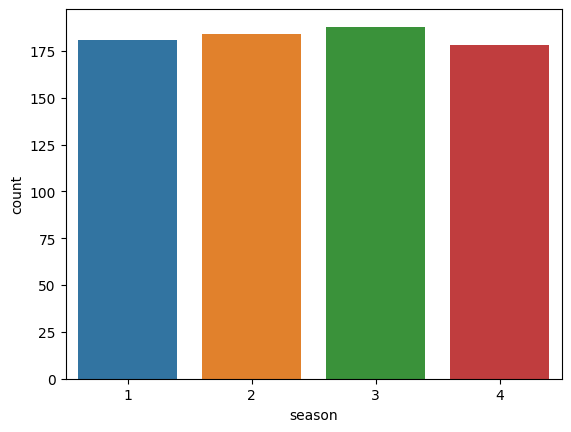

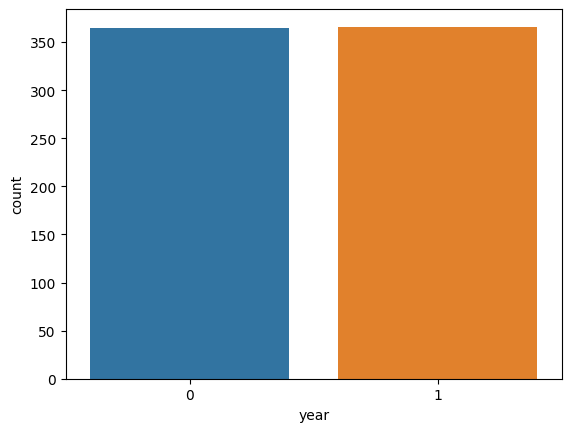

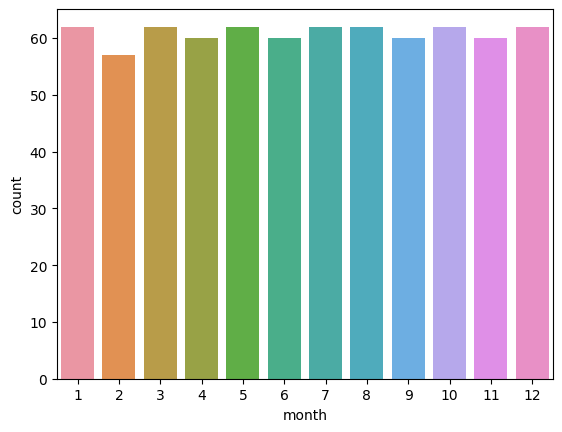

In [4]:
cat_var = ['season', 'year', 'month']


for var in cat_var:
    sns.countplot(x=var, data=df)
    plt.show()

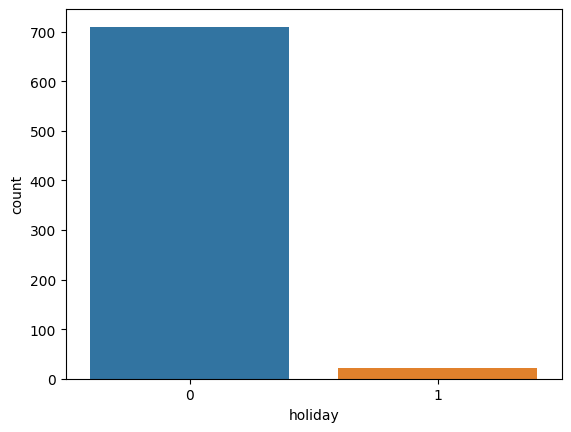

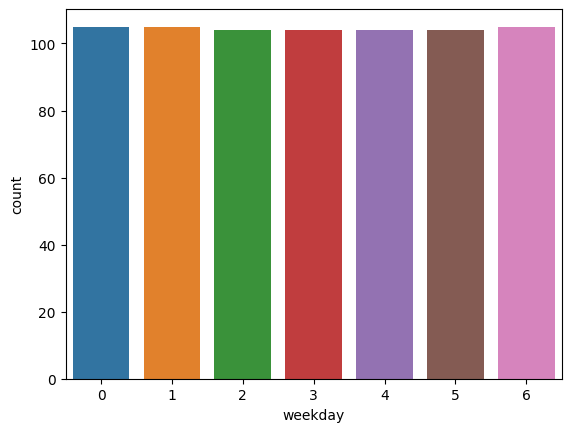

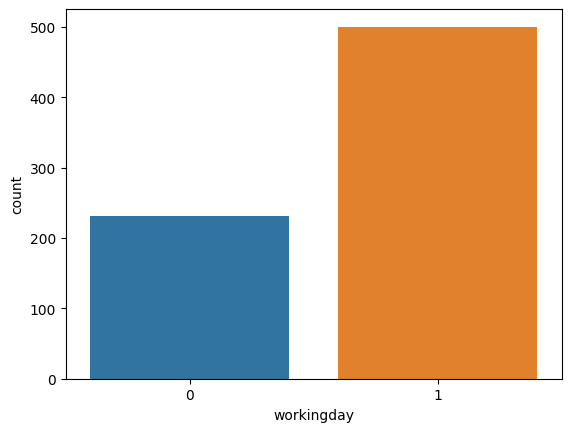

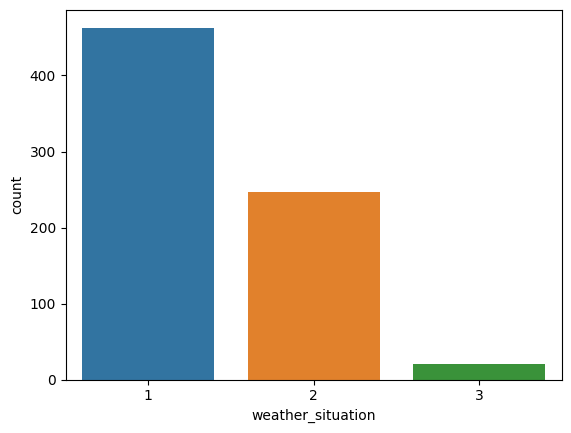

In [5]:
cat_var2 = ['holiday', 'weekday','workingday', 'weather_situation']


for var in cat_var2:
    sns.countplot(x=var, data=df)
    plt.show()

C:\Users\user1\AppData\Local\Temp\ipykernel_7400\1316184306.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,var],kde=False)


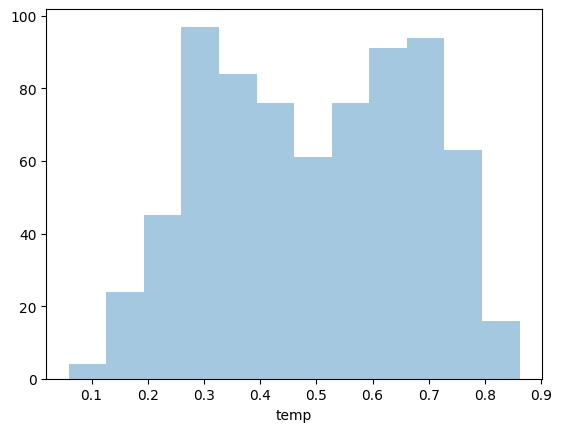

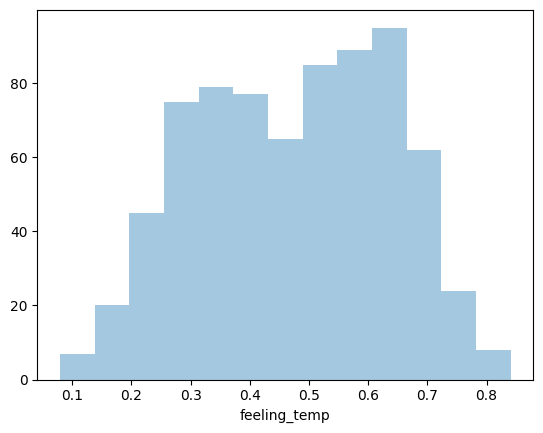

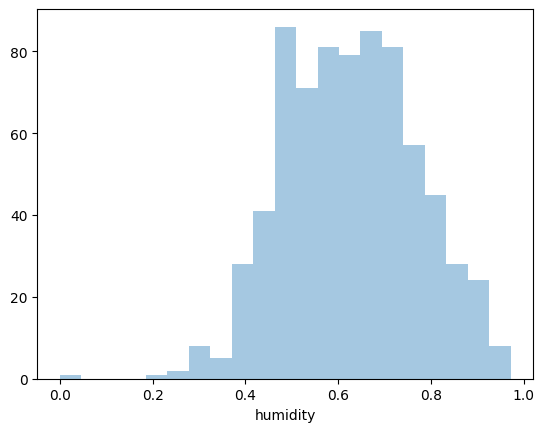

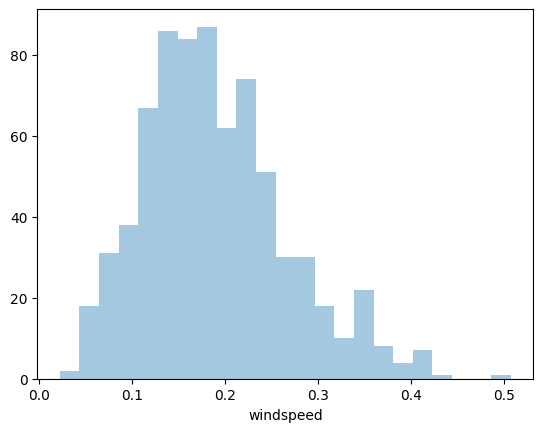

In [6]:
condition_var = ['temp', 'feeling_temp','humidity', 'windspeed']

for var in condition_var:
    sns.distplot(df.loc[:,var],kde=False) 
    plt.show()


The distributions of continuous variables temp and feel_temp are close to normal distribution, however the distribution of continuous variable windspeed is right-skewed and humidity is left-skewed.

C:\Users\user1\AppData\Local\Temp\ipykernel_7400\430669060.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_count,kde=False)


<Axes: xlabel='total_count'>

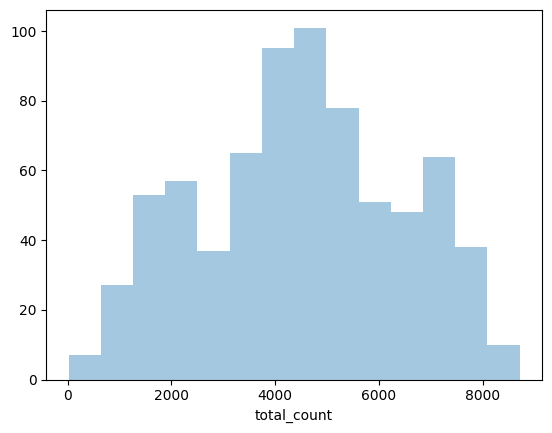

In [7]:
sns.distplot(df.total_count,kde=False)

C:\Users\user1\AppData\Local\Temp\ipykernel_7400\100199671.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, ax=ax)


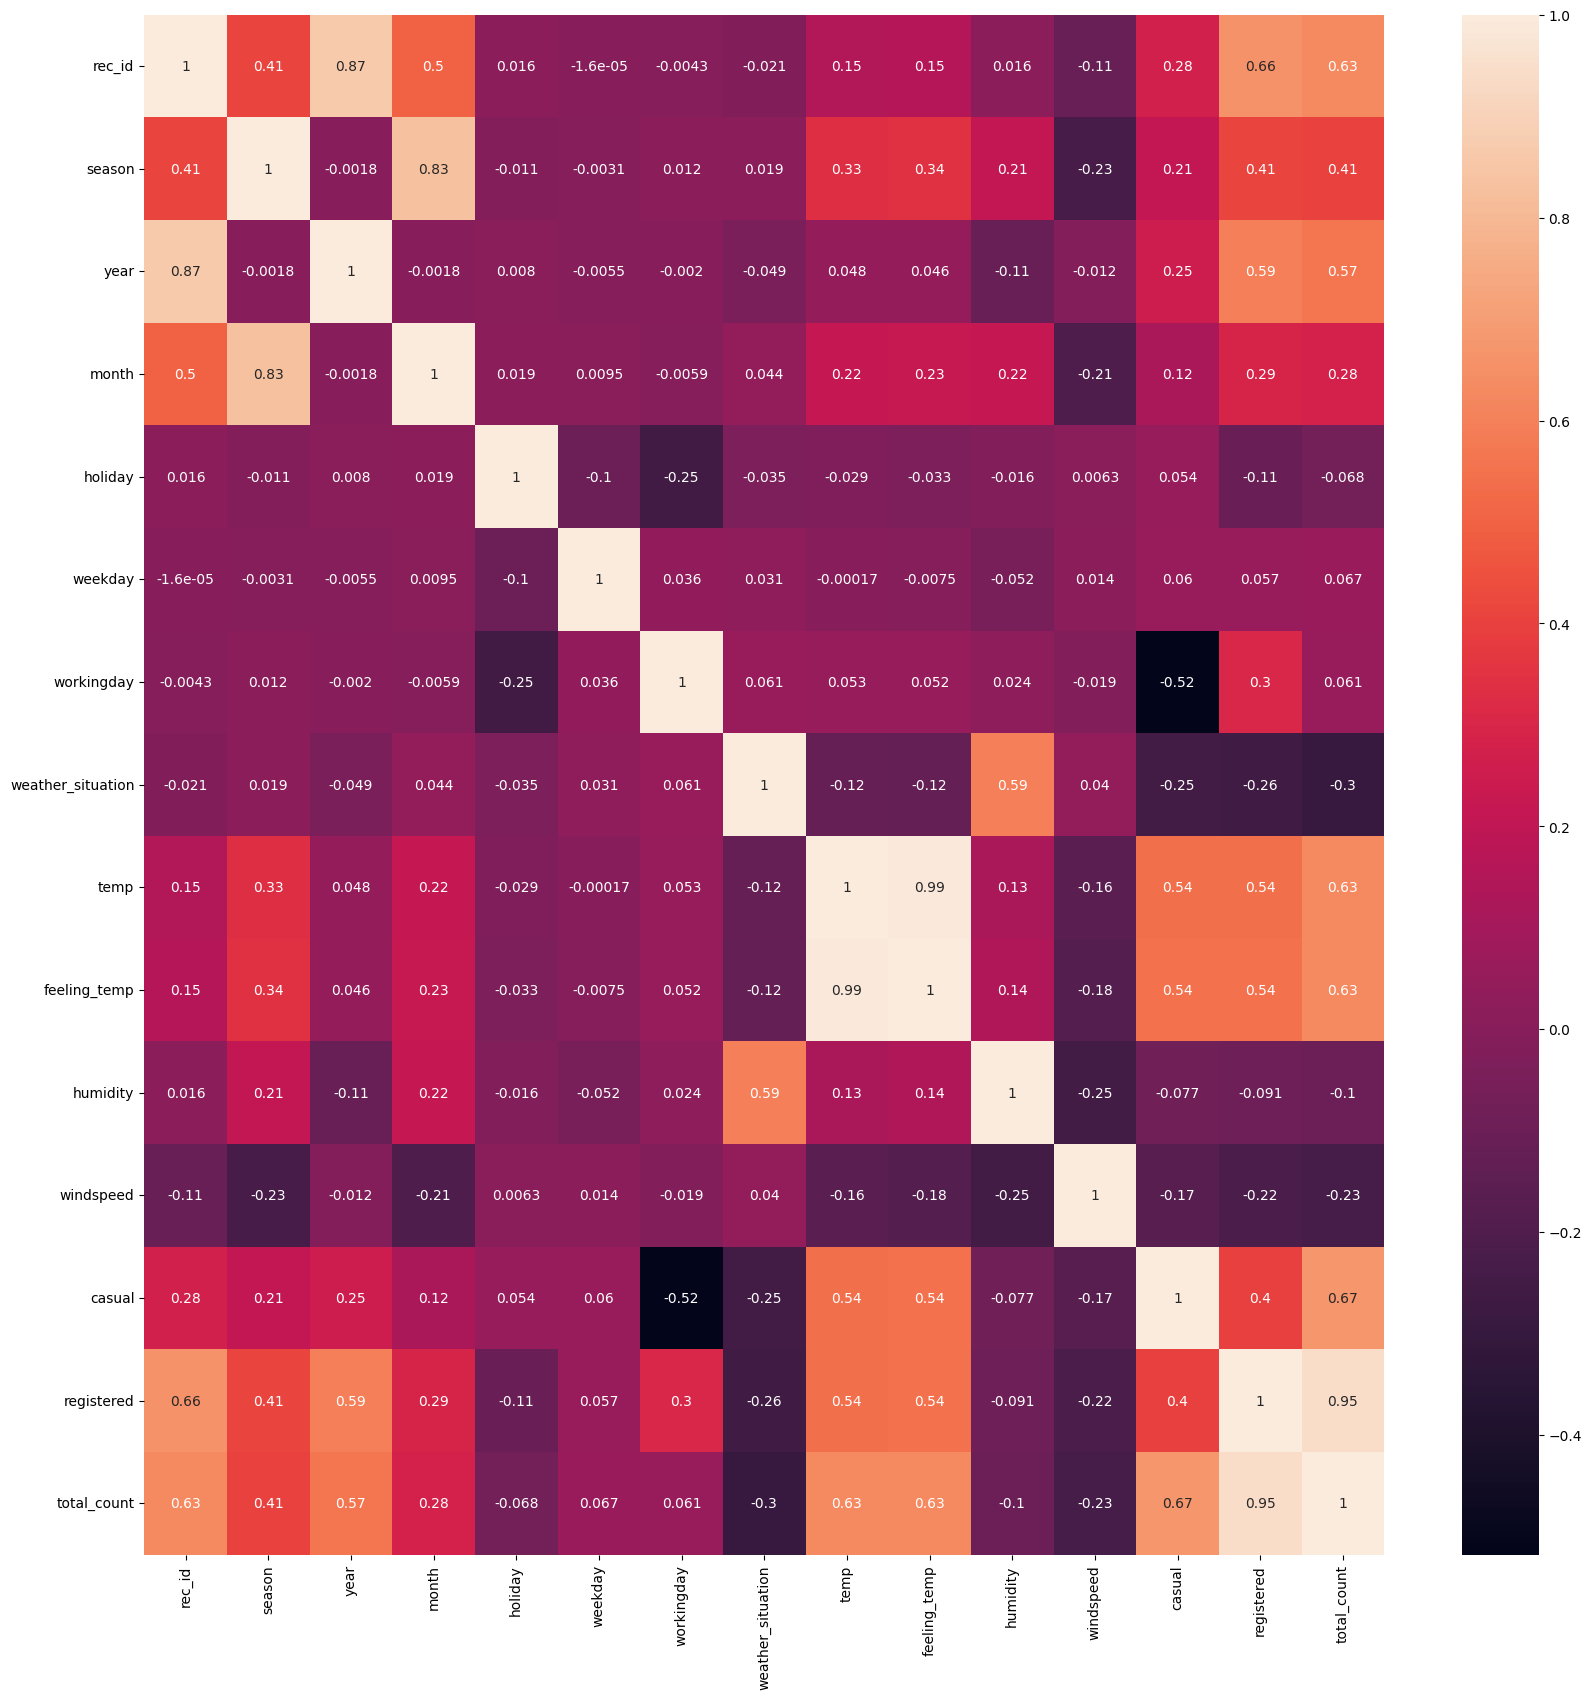

In [8]:
# Let's see the correlation between different variables using heatmap
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, ax=ax)
plt.show()

This heat map shows the correlation of different labels, for example, feeling temperature is highly correlated with the temperature, which makes sense, and the final total count of bike is highly correlated with the registered. 

### Modelling

## =======================Decision Tree Regressor=========================

In [9]:
df_for_comparison_result = pd.DataFrame(columns=['model name','prediction mean', 'MAE', 'MSE', 'R2 score/Accuracy'])

data_dtg = df.copy(deep=True)
data_dtg.isna().sum()
data_dtg.duplicated().sum()

0

In [10]:
X = data_dtg[['season', 'year', 'month', 'holiday',
       'weekday', 'workingday', 'weather_situation', 'temp',
       'humidity', 'windspeed', 'casual', 'registered']]
y = data_dtg['total_count']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [13]:
model_predictions = model.predict(X_test)

In [14]:
print(model.score(X_test, y_test))

0.9891884384080887


In [15]:
new_row = {"model name": "Decision Tree Regressor", "prediction mean": model_predictions.mean(), "MAE": mean_absolute_error(y_test, model_predictions), "MSE": mean_squared_error(y_test, model_predictions), "R2 score/Accuracy": r2_score(y_test, model_predictions)}
df_for_comparison_result = df_for_comparison_result.append(new_row, ignore_index=True)
print('MAE: ', mean_absolute_error(y_test, model_predictions))
print('MSE: ', mean_squared_error(y_test, model_predictions))
print('EVS: ', explained_variance_score(y_test, model_predictions))
print('R2 Score: ', r2_score(y_test, model_predictions))
rmse = mean_squared_error(y_test, model_predictions, squared=False)
print('RMSE: ', rmse)

MAE:  132.98636363636365
MSE:  36368.240909090906
EVS:  0.989188691520153
R2 Score:  0.9891884384080887
RMSE:  190.7045906869861


C:\Users\user1\AppData\Local\Temp\ipykernel_7400\696829092.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_for_comparison_result = df_for_comparison_result.append(new_row, ignore_index=True)


In [16]:
model_predictions.mean()

4383.227272727273

## ==========================Random Forest Regressor====================

In [17]:
data_rfg = df.copy(deep=True)
features = ["season","year","month","holiday","weekday","workingday","weather_situation",
            "temp","humidity","windspeed", "casual", "registered"]
X = data_rfg[features]
y = data_rfg["total_count"]

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
pred = rf.predict(X_val)
rf.score(X_val, y_val)

0.9946849799104974

In [20]:
predict_data = pd.DataFrame(pred , index = y_val.index)
predict_data

,0
160,4564.50
304,4071.56
447,7777.66
361,2263.57
545,5561.64
...,...
0,838.98
347,3747.96
184,5429.47
167,4841.69


In [21]:
idx = np.sort(y_val.index)
y_true = y_val[idx]
y_pred = predict_data[0][idx]
y_true, y_pred

(0       985
 4      1600
 5      1606
 10     1263
 17      683
        ... 
 707    5582
 712    5532
 722    1787
 727    3095
 729    1796
 Name: total_count, Length: 147, dtype: int64,
 0       838.98
 4      1636.66
 5      1653.01
 10     1347.73
 17      642.37
         ...   
 707    5665.58
 712    5583.17
 722    1722.21
 727    3122.52
 729    1933.85
 Name: 0, Length: 147, dtype: float64)

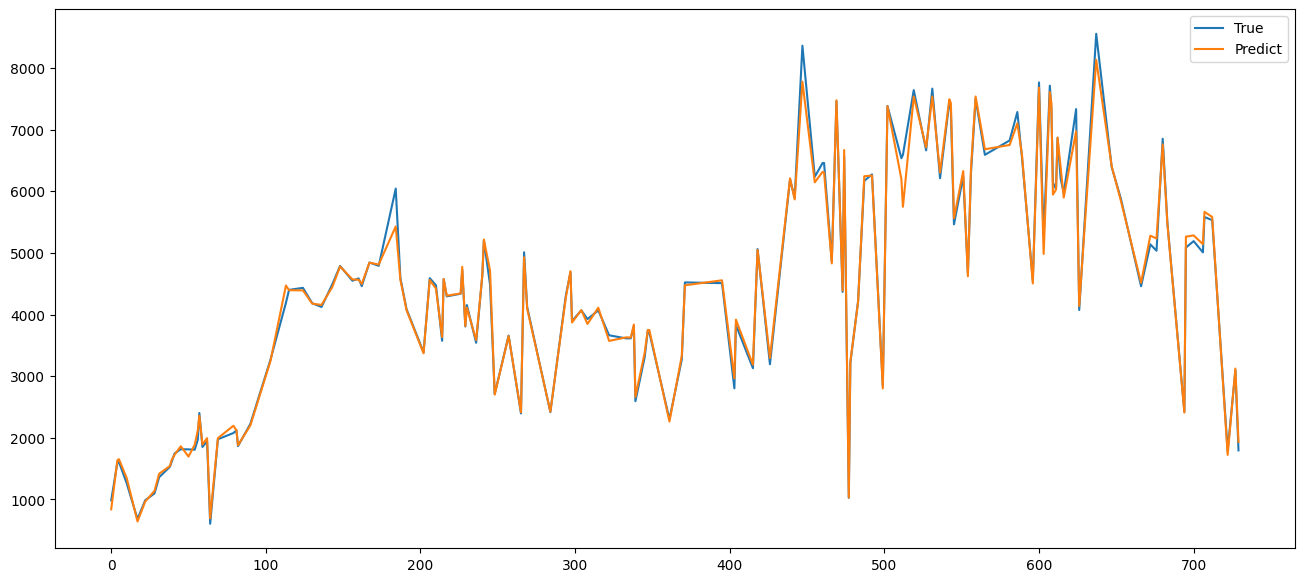

In [22]:
plt.figure(figsize = (16, 7))
plt.plot(idx, y_true, label = "True")
plt.plot(idx, y_pred, label = "Predict")
plt.legend()
plt.show()

In [23]:
new_row = {"model name": "Random Forest Regressor", "prediction mean": y_pred.mean(), "MAE": mean_absolute_error(y_val, pred), "MSE": mean_squared_error(y_val, pred), "R2 score/Accuracy": r2_score(y_val, pred)}
df_for_comparison_result = df_for_comparison_result.append(new_row, ignore_index=True)
y_pred.mean()

C:\Users\user1\AppData\Local\Temp\ipykernel_7400\845169801.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_for_comparison_result = df_for_comparison_result.append(new_row, ignore_index=True)


4387.346530612245

## ===========================Prophet Model============================

In [24]:
df_pro = df.copy(deep=True)
df_pro = df_pro[['datetime', 'total_count', 'temp']].dropna()
df_pro['date_index'] = df_pro['datetime']
df_pro['date_index'] = pd.to_datetime(df_pro['date_index'])
df_pro = df_pro.set_index('date_index')
df_pro.columns=['ds','y','temp']

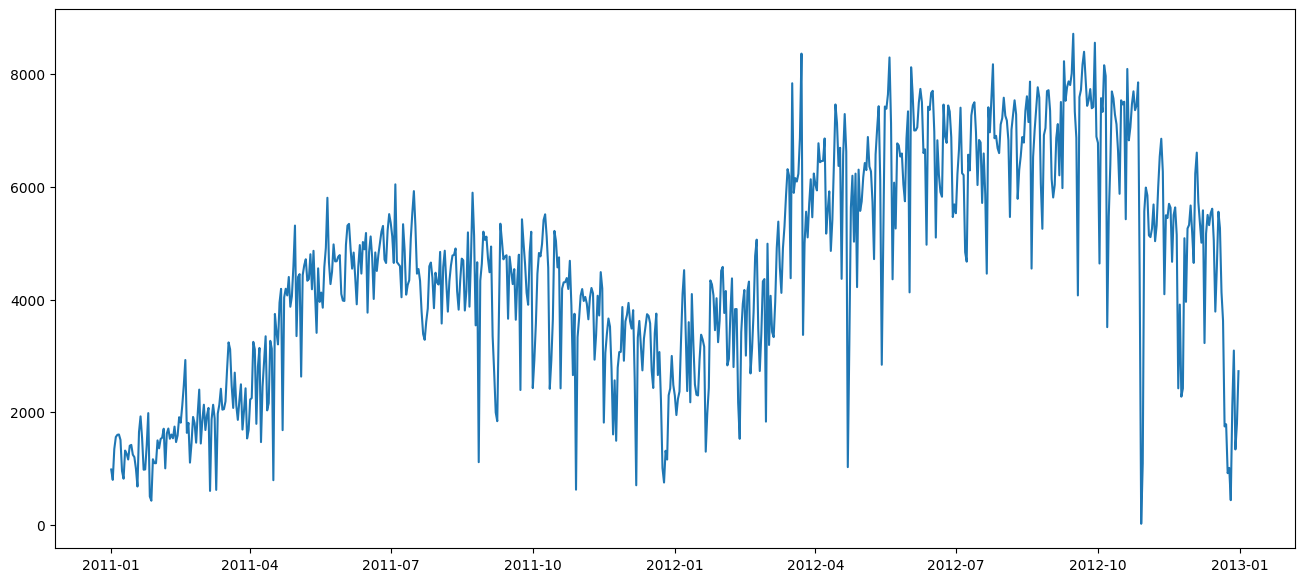

In [25]:
plt.figure(figsize = (16, 7))
plt.plot(df_pro.index,df_pro.y)
plt.show()

In [26]:
from prophet import Prophet
m=Prophet(interval_width=0.95,yearly_seasonality=True)
m.fit(df_pro)

10:47:49 - cmdstanpy - INFO - Chain [1] start processing
10:47:49 - cmdstanpy - INFO - Chain [1] done processing


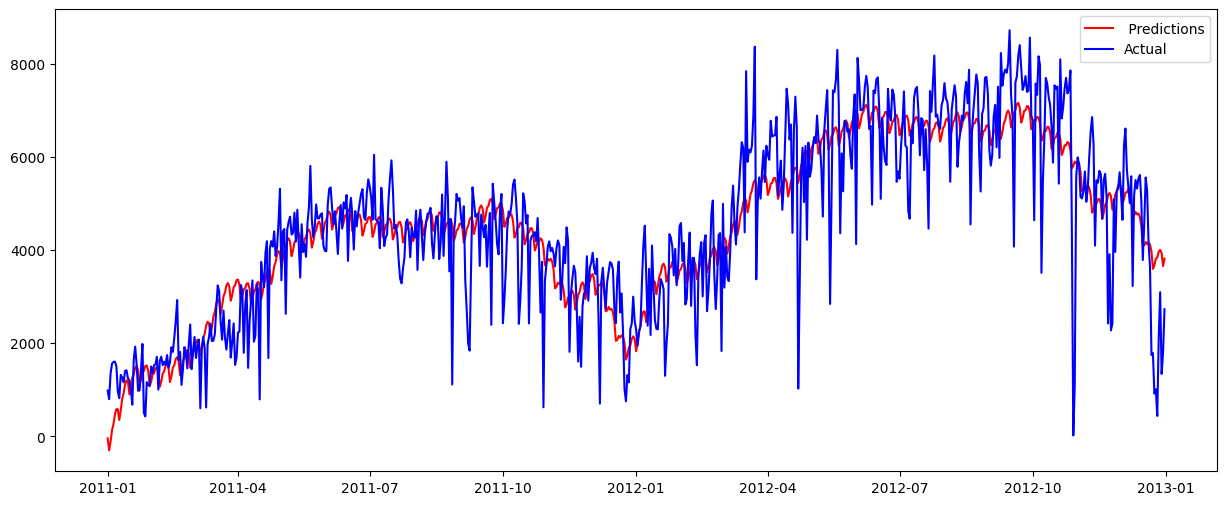

In [27]:
future=m.make_future_dataframe(periods=50,include_history=True)
forecast=m.predict(future)
preds= forecast['yhat'][:-50]
plt.figure(figsize=(15,6))
plt.plot(df_pro.index,preds,color='red',label=' Predictions')
plt.plot(df_pro.index,df_pro.y,color='blue',label='Actual')
plt.legend()
plt.show()

In [28]:
new_row = {"model name": "Prophet Model 1", "prediction mean": forecast['yhat'].mean(), "MAE": round(mean_absolute_error(df_pro["y"], preds), 3), "MSE": round(mean_squared_error(df_pro["y"], preds), 3), "R2 score/Accuracy": round(r2_score(df_pro["y"], preds), 3)}
df_for_comparison_result = df_for_comparison_result.append(new_row, ignore_index=True)
r2 = round(r2_score(df_pro["y"], preds), 3)
mse = round(mean_squared_error(df_pro["y"], preds), 3)
mae = round(mean_absolute_error(df_pro["y"], preds), 3)
print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  0.745
MSE:  954172.242
MAE:  704.689


C:\Users\user1\AppData\Local\Temp\ipykernel_7400\2097268563.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_for_comparison_result = df_for_comparison_result.append(new_row, ignore_index=True)


In [29]:
forecast['yhat'].mean()

4549.836083230157

In [30]:
my_model = Prophet()
my_model.fit(df_pro)


10:47:50 - cmdstanpy - INFO - Chain [1] start processing
10:47:50 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
future_dates = my_model.make_future_dataframe(periods=12, freq='MS')
future_dates.head()

,ds
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05


In [32]:
forecast2 = my_model.predict(future_dates)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2011-01-01,-41.024661,-1218.185191,1233.420954
1,2011-01-02,-296.007365,-1501.407014,921.417812
2,2011-01-03,-112.063546,-1369.258267,1168.762813
3,2011-01-04,137.192359,-1113.167583,1483.961538
4,2011-01-05,261.933500,-966.017482,1499.075588


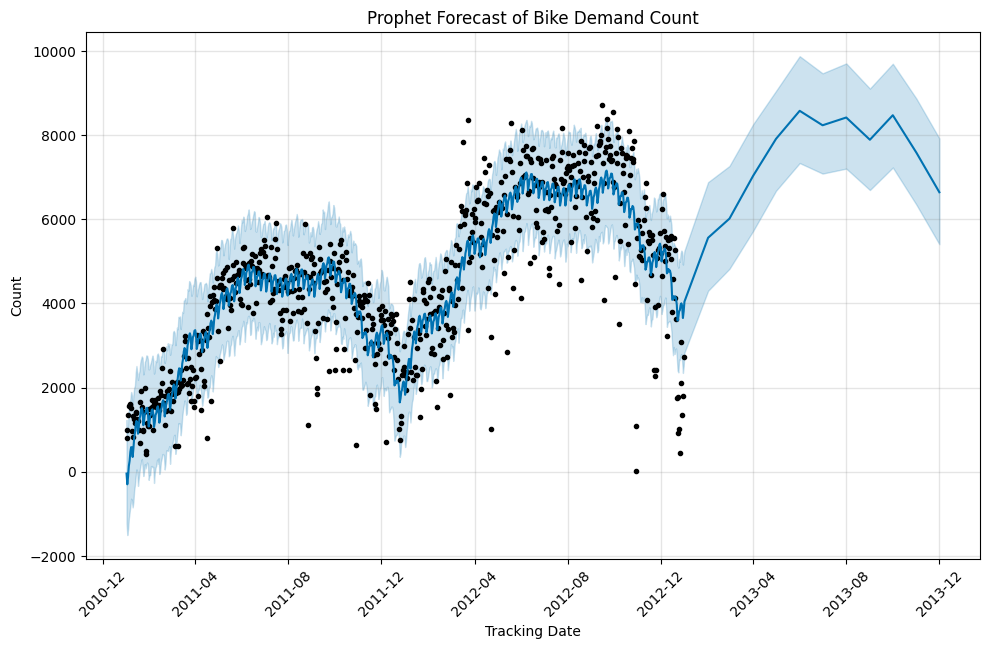

In [33]:
my_model.plot(forecast2, uncertainty=True)

plt.xlabel("Tracking Date")
plt.ylabel("Count")
plt.title('Prophet Forecast of Bike Demand Count')


# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [34]:
new_row = {"model name": "Prophet Model 2", "prediction mean": forecast2['yhat'].mean(), "MAE": round(mean_absolute_error(df_pro['y'], forecast2['yhat'][:len(df_pro)]), 3), "MSE": round(mean_squared_error(df_pro['y'], forecast2['yhat'][:len(df_pro)]), 3), "R2 score/Accuracy": round(r2_score(df_pro['y'], forecast2['yhat'][:len(df_pro)]), 3)}
df_for_comparison_result = df_for_comparison_result.append(new_row, ignore_index=True)

# Calculate R-squared
r2 = r2_score(df_pro['y'], forecast2['yhat'][:len(df_pro)])
print('R-squared:', r2)

# Calculate MAE
mae = mean_absolute_error(df_pro['y'], forecast2['yhat'][:len(df_pro)])
print('MAE:', mae)

# Calculate MSE
mse = mean_squared_error(df_pro['y'], forecast2['yhat'][:len(df_pro)])
print('MSE:', mse)

R-squared: 0.7453948172399385
MAE: 704.6890363576559
MSE: 954172.2423661544


C:\Users\user1\AppData\Local\Temp\ipykernel_7400\4089520058.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_for_comparison_result = df_for_comparison_result.append(new_row, ignore_index=True)


In [35]:
forecast2['yhat'].mean()

4548.415166844749

## =================================RNN==================================

In [36]:
data_rnn = df.copy(deep=True)
data_rnn.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_situation,temp,feeling_temp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [37]:
data_rnn.columns = ['rec_id','datetime','season','year','month','holiday','weekday',
                    'workingday','weather_situation','temp','feeling_temp','humidity',
                    'windspeed','casual','registered','total_count']

data_rnn.drop(columns='rec_id',inplace=True)

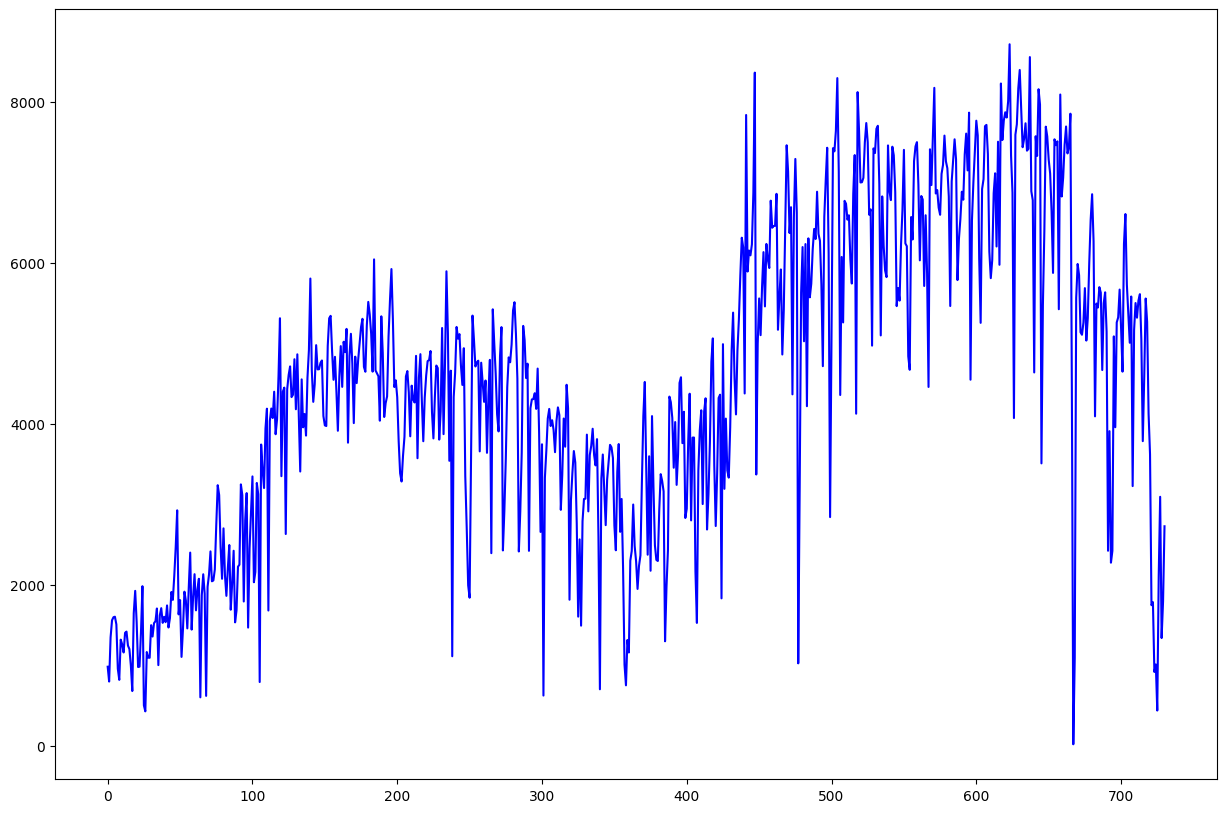

In [38]:
plt.figure(figsize=(15,10))
plt.plot(data_rnn['total_count'], color='blue')
plt.show()

In [39]:
temp = data_rnn[data_rnn.year == 1]
temp = temp[temp.month == 10]
print(temp.total_count.mean())

6414.225806451613


In [40]:
data_rnn['total_count'][667] = 6414
data_rnn['total_count'][668] = 6414

C:\Users\user1\AppData\Local\Temp\ipykernel_7400\4098229437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rnn['total_count'][667] = 6414
C:\Users\user1\AppData\Local\Temp\ipykernel_7400\4098229437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rnn['total_count'][668] = 6414


In [41]:
one_hot = pd.get_dummies(data_rnn['weekday'], prefix='weekday')
data_rnn = data_rnn.join(one_hot)
one_hot = pd.get_dummies(data_rnn['weather_situation'], prefix='weather_situation')
data_rnn = data_rnn.join(one_hot)
one_hot = pd.get_dummies(data_rnn['month'], prefix='month')
data_rnn = data_rnn.join(one_hot)

In [42]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(np.array(data_rnn['total_count']).reshape(len(data_rnn['total_count']), 1))
series = pd.DataFrame(scaled)
series.columns = ['total_count_scaled']

In [43]:
data_rnn = pd.merge(data_rnn, series, left_index=True, right_index=True)
number_of_test_data = 50
number_of_holdout_data = 50
number_of_training_data = len(data_rnn) - number_of_holdout_data - number_of_test_data
print ("total, train, test, holdout:", len(data_rnn), number_of_training_data, number_of_test_data, number_of_holdout_data)

total, train, test, holdout: 731 631 50 50


In [44]:
datatrain = data_rnn[:number_of_training_data]
datatest = data_rnn[-(number_of_test_data+number_of_holdout_data):-number_of_holdout_data]
datahold = data_rnn[-number_of_holdout_data:]

In [45]:
in_seq1 = np.array(datatrain['holiday'])
in_seq2 = np.array(datatrain['workingday'])
in_seq3 = np.array(datatrain['temp'])
in_seq4 = np.array(datatrain['feeling_temp'])
in_seq5 = np.array(datatrain['humidity'])
in_seq6 = np.array(datatrain['windspeed'])
in_seq7 = np.array(datatrain['weekday_0'])
in_seq8 = np.array(datatrain['weekday_1'])
in_seq9 = np.array(datatrain['weekday_2'])
in_seq10 = np.array(datatrain['weekday_3'])
in_seq11 = np.array(datatrain['weekday_4'])
in_seq12 = np.array(datatrain['weekday_5'])
in_seq13 = np.array(datatrain['weekday_6'])
in_seq14 = np.array(datatrain['weather_situation_1'])
in_seq15 = np.array(datatrain['weather_situation_2'])
in_seq16 = np.array(datatrain['weather_situation_3'])
out_seq_train = np.array(datatrain['total_count_scaled'])

In [46]:
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
in_seq14 = in_seq14.reshape((len(in_seq14), 1))
in_seq15 = in_seq15.reshape((len(in_seq15), 1))
in_seq16 = in_seq16.reshape((len(in_seq16), 1))
out_seq_train = out_seq_train.reshape((len(out_seq_train), 1))

In [47]:
datatrain_feed = np.hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6, in_seq7, in_seq8, in_seq9, in_seq10, in_seq11, in_seq12, in_seq13, in_seq14, in_seq15, in_seq16, out_seq_train))

In [48]:
in_seq1 = np.array(datatest['holiday'])
in_seq2 = np.array(datatest['workingday'])
in_seq3 = np.array(datatest['temp'])
in_seq4 = np.array(datatest['feeling_temp'])
in_seq5 = np.array(datatest['humidity'])
in_seq6 = np.array(datatest['windspeed'])
in_seq7 = np.array(datatest['weekday_0'])
in_seq8 = np.array(datatest['weekday_1'])
in_seq9 = np.array(datatest['weekday_2'])
in_seq10 = np.array(datatest['weekday_3'])
in_seq11 = np.array(datatest['weekday_4'])
in_seq12 = np.array(datatest['weekday_5'])
in_seq13 = np.array(datatest['weekday_6'])
in_seq14 = np.array(datatest['weather_situation_1'])
in_seq15 = np.array(datatest['weather_situation_2'])
in_seq16 = np.array(datatest['weather_situation_3'])
out_seq_test = np.array(datatest['total_count_scaled'])

In [49]:
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
in_seq14 = in_seq14.reshape((len(in_seq14), 1))
in_seq15 = in_seq15.reshape((len(in_seq15), 1))
in_seq16 = in_seq16.reshape((len(in_seq16), 1))
out_seq_test = out_seq_test.reshape((len(out_seq_test), 1))

In [50]:
datatest_feed = np.hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6, in_seq7, in_seq8, in_seq9, in_seq10, in_seq11, in_seq12, in_seq13, in_seq14, in_seq15, in_seq16, out_seq_test))

In [51]:
in_seq1 = np.array(datahold['holiday'])
in_seq2 = np.array(datahold['workingday'])
in_seq3 = np.array(datahold['temp'])
in_seq4 = np.array(datahold['feeling_temp'])
in_seq5 = np.array(datahold['humidity'])
in_seq6 = np.array(datahold['windspeed'])
in_seq7 = np.array(datahold['weekday_0'])
in_seq8 = np.array(datahold['weekday_1'])
in_seq9 = np.array(datahold['weekday_2'])
in_seq10 = np.array(datahold['weekday_3'])
in_seq11 = np.array(datahold['weekday_4'])
in_seq12 = np.array(datahold['weekday_5'])
in_seq13 = np.array(datahold['weekday_6'])
in_seq14 = np.array(datahold['weather_situation_1'])
in_seq15 = np.array(datahold['weather_situation_2'])
in_seq16 = np.array(datahold['weather_situation_3'])
out_seq_hold = np.array(datahold['total_count_scaled'])

In [52]:
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
in_seq14 = in_seq14.reshape((len(in_seq14), 1))
in_seq15 = in_seq15.reshape((len(in_seq15), 1))
in_seq16 = in_seq16.reshape((len(in_seq16), 1))
out_seq_hold = out_seq_hold.reshape((len(out_seq_hold), 1))

In [53]:
datahold_feed = np.hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6, in_seq7, in_seq8, in_seq9, in_seq10, in_seq11, in_seq12, in_seq13, in_seq14, in_seq15, in_seq16, out_seq_hold))

In [54]:
n_features = datatrain_feed.shape[1]
n_input = 10
generator_train = TimeseriesGenerator(datatrain_feed, out_seq_train, length=n_input, batch_size=len(datatrain_feed))

In [55]:
generator_test = TimeseriesGenerator(datatest_feed, out_seq_test, length=n_input, batch_size=1)
generator_hold = TimeseriesGenerator(datahold_feed, out_seq_hold, length=n_input, batch_size=1)

In [56]:
print("timesteps, features:", n_input, n_features)
model = Sequential()

model.add(SimpleRNN(4, activation='relu', input_shape=(n_input, n_features), return_sequences = False))
model.add(Dense(1, activation='relu'))

adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='mse')

model.summary()


timesteps, features: 10 17
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 4)                 88        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


C:\Users\user1\anaconda3\envs\env_for_pycarat\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [57]:
score = model.fit_generator(generator_train, epochs=3000, verbose=0, validation_data=generator_test)

C:\Users\user1\AppData\Local\Temp\ipykernel_7400\1338044232.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  score = model.fit_generator(generator_train, epochs=3000, verbose=0, validation_data=generator_test)


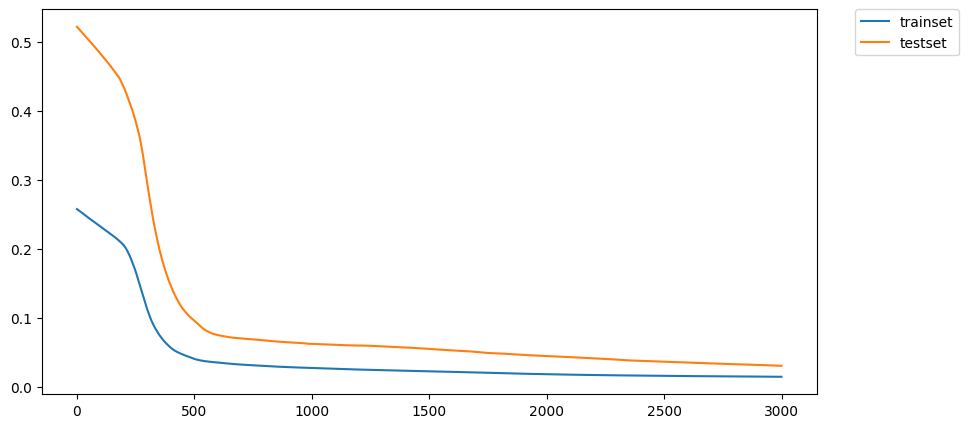

In [58]:
losses = score.history['loss']
val_losses = score.history['val_loss']
plt.figure(figsize=(10,5))
plt.plot(losses, label="trainset")
plt.plot(val_losses, label="testset")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
df_result_test = pd.DataFrame({'Actual' : [], 'Prediction' : []})

for i in range(len(generator_test)):
    x, y = generator_test[i]
    x_input = np.array(x).reshape((1, n_input, n_features))
    yhat = model.predict(x_input, verbose=2)
    df_result_test = df_result_test.append({'Actual': scaler.inverse_transform(y)[0][0], 
                                            'Prediction': scaler.inverse_transform(yhat)[0][0]}, ignore_index=True)

In [ ]:
df_result_test['Diff'] = 100 * (df_result_test['Prediction'] - df_result_test['Actual']) / df_result_test['Actual']
df_result_test

In [ ]:
mean = df_result_test['Actual'].mean()
mae = (df_result_test['Actual'] - df_result_test['Prediction']).abs().mean()

new_row = {"model name": "RNN", "prediction mean": df_result_test['Prediction'].mean(), "MAE": mean_absolute_error(df_result_test['Actual'], df_result_test['Prediction']), "MSE": mean_squared_error(df_result_test['Actual'], df_result_test['Prediction']), "R2 score/Accuracy": 1 - 1*mae/mean}
df_for_comparison_result = df_for_comparison_result.append(new_row, ignore_index=True)


print("mae:", mae)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df_result_test['Actual'], color='blue')
plt.plot(df_result_test['Prediction'], color='red')
plt.show()

In [ ]:
df_result_hold = pd.DataFrame({'Actual' : [], 'Prediction' : []})

for i in range(len(generator_hold)):
    x, y = generator_hold[i]
    x_input = np.array(x).reshape((1, n_input, n_features))
    yhat = model.predict(x_input, verbose=2)
    df_result_hold = df_result_hold.append({'Actual': scaler.inverse_transform(y)[0][0], 
                                            'Prediction': scaler.inverse_transform(yhat)[0][0]}, ignore_index=True)

In [ ]:
mean = df_result_hold['Actual'].mean()
mae = (df_result_hold['Actual'] - df_result_hold['Prediction']).abs().mean()

new_row = {"model name": "RNN-holdout", "prediction mean": df_result_hold['Prediction'].mean(), "MAE": mean_absolute_error(df_result_test['Actual'], df_result_hold['Prediction']), "MSE": mean_squared_error(df_result_hold['Actual'], df_result_hold['Prediction']), "R2 score/Accuracy": 1 - 1*mae/mean}
df_for_comparison_result = df_for_comparison_result.append(new_row, ignore_index=True)

print("mae:", mae)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df_result_hold['Actual'], color='blue')
plt.plot(df_result_hold['Prediction'], color='red')
plt.show()

In [ ]:
df_result_hold['Prediction'].mean()

In [ ]:
print("decision tree prediction mean: ",model_predictions.mean())
print("random forest regressor prediction mean: ",y_pred.mean())
print("prophet model prediction mean: ",model_predictions.mean())
print("second prophet model prediction mean: ",forecast2['yhat'].mean())
print("RNN prediction test mean: ",df_result_test['Prediction'].mean())
print("RNN prediction hold mean: ",df_result_hold['Prediction'].mean())

In [ ]:
df_for_comparison_result